# Fundamentals of Returns
This document shows a few examples of how to use and calculate some basic measures of returns.


By: Ismael Jiménez

License: MIT

Import the necessary quantopy subpackages and set random seed to get always the same results.

In [1]:
import quantopy as qp
import numpy as np

np.random.seed(100)

Generate the stock prices that we are going to use for our analysis, with an initial price of "1" and assuming simple returns are normally distributed and i.i.d. (in- dependent and identically distributed) with mean μ and standard deviation σ:

$R_{1}$ = $  \mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0.05, 0.02^2) $

$R_{2}$ = $ \mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0.05, 0.1^2) $

**Note:** The assumption of normal distribution for simple returns is made out of simplicity, but be aware that it is not always appropiate because as asset prices must be non-negative, returns must always be larger than −1. However, the normal distribution is defined for −∞ ≤ R ≤ ∞ and based on the assumed normal distribution Pr(R < −1) > 0. That is, there is non-zero chance that R is smaller than −1. This is why the normal distribution may not appropriate for simple returns. [[1]] A more valid assumption would be to assume simple returns follow a log-normal distribution (although also an incomplete assumption), but as for small returns (|R| < 0.1) both distributions are mostly equivalent [[2]] for this basic tutorial a normal distribution assumption for returns will suffice.

<AxesSubplot:title={'center':'Stock Prices'}>

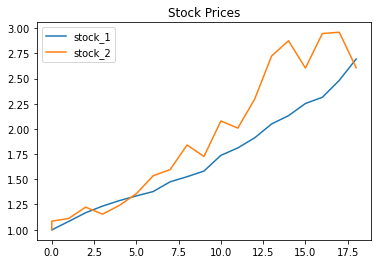

In [2]:
stock_prices = qp.random.generator.prices(initial_price = [1, 1], mu = [0.05, 0.05], sigma = [0.03, 0.1], size = 20)
stock_prices.columns = ['stock_1', 'stock_2']
stock_prices.plot(title='Stock Prices')

Now, we will generate a return dataframe from the stock prices, that we will use for all our subsequent analysis.

In [3]:
rdf = qp.ReturnDataFrame.from_price(stock_prices)
rdf.head()

,stock_1,stock_2
0,-0.002493,0.084268
1,0.084591,0.024756
2,0.079440,0.101422
3,0.056635,-0.057004
4,0.044315,0.075500


We can now plot the returns, to get an overall feeling of the behaviour of the two return series.  

<AxesSubplot:title={'center':'Stock Returns'}>

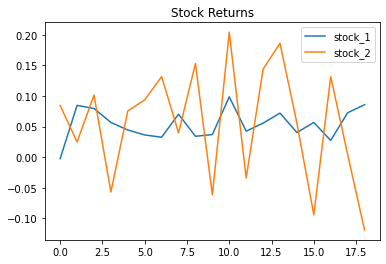

In [4]:
rdf.plot(title='Stock Returns')

## Analysis of basice shape characteristics of probability distribution

Very often we would like to know certain shape characteristics of a probability distribution. We might want to know where the distribution is centered, and how spread out the distribution is about the central value. Inthis section we will calculate the two most basic shape characteristics of a probability distribution:

1. expected value (mean): measures the center of mass of a distribution

2. variance and standard deviation: measures the spread about the mean

### Mean of the returns

In [5]:
rdf.mean()

stock_1    0.053853
stock_2    0.055940
dtype: float64

We see that as expected both stock have a 5% expected monthly return.

### Standard Deviation of returns

In [6]:
rdf.std()

stock_1    0.025062
stock_2    0.095463
dtype: float64

As we can see even though both stocks have the same expected return, returns for stock_2 are much more volatile. This is why average returns are not a good measure of how an asset behave, as it can be quite misleading. [[3]]

## Annualization

One useful calculation that would allow us comparing returns from different periods of time is the annualization.

### Annual Rate of Return

In [7]:
rdf.effect(qp.stats.period.MONTHLY)

stock_1    0.876559
stock_2    0.921634
dtype: float64

### Annual Volatility

In [8]:
rdf.effect_vol(qp.stats.period.MONTHLY)

stock_1    0.086817
stock_2    0.330695
dtype: float64

## Calculate Total Returns

Another basic measure that is quite useful is the calculation of the total return over the full holding period.

In [9]:
rdf.total_return()

stock_1    1.695291
stock_2    1.608343
dtype: float64

We can see that stock_1 had a total return of 169% and stock_2 a total return of 160%. 

## Sources
[1] Eric Zivot "Review of Random Variables", *University of Washington*. Econ 424

[2] Ruppert and Matteson " Statistics and Data Analysis for Financial Engineering, 2nd edition", *Springer*. Chapter §2.1.3

[3] Vijay Vaidyanathan "Fundamentals of returns" EDHEC-Risk Institute. Module 1 - Analyzing Returns